##### Assignment 4 - Linear Regression

## Part 1 - Read your data frame.

The CSV file is "hockey_data2.csv".  This data came from Kaggle.  It has **a lot** of hockey performance features.  You will want to read up on some of them.  Looking at correlations with Salary might help you find important features.  

In [40]:
import pandas as pd

# Load the CSV file
hockey_df = pd.read_csv("hockey_data2.csv")

# Calculate the correlation coefficients
hockey_corr = hockey_df.corr()["Salary"].sort_values(ascending=False)

# Print the correlations
print(hockey_corr)



Salary    1.000000
GF        0.659654
xGF       0.657915
SCF       0.652631
SF        0.651598
            ...   
iHDf     -0.058446
iPenDf   -0.061890
DftRd    -0.206641
Ovrl     -0.222808
DftYr    -0.471547
Name: Salary, Length: 144, dtype: float64


## Part 2 - Display info
Take a look at the information.  Note any features that are missing values.  Note any features that are objects, but could be numerical

In [41]:
import numpy as np

print("********INFO********")
print(hockey_df.info())
print("********IsNull********")
print(hockey_df.isnull().sum())
print("********Check for Numerical********")
for col in hockey_df.columns:
    if hockey_df[col].dtype == 'object' and pd.to_numeric(hockey_df[col], errors='coerce').notnull().all():
        print(col, 'could be numerical')

********INFO********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Columns: 154 entries, Salary to GS/G
dtypes: float64(73), int64(71), object(10)
memory usage: 736.4+ KB
None
********IsNull********
Salary      0
Born        0
City        0
Pr/St     153
Cntry       0
         ... 
Grit        0
DAP         0
Pace        1
GS          1
GS/G        2
Length: 154, dtype: int64
********Check for Numerical********


Clean up any missing data values.  If a lot of values of a feature are missing, remove the feature.  Otherwise remove the instance or replace by the median.

In [42]:
import numpy as np

print("********Cleaning Dataset********")

threshold = len(hockey_df)*0.4
hockey_df = hockey_df.dropna(thresh=threshold, axis=1)
    
for col in hockey_df.columns:
    if hockey_df[col].isnull().sum() > 0:
        if hockey_df[col].isnull().sum() > 0.4*len(hockey_df):
            hockey_df = hockey_df.drop(col, axis=1, inplace=True)
        else:
            if hockey_df[col].dtype == 'float64':
                median = np.median(hockey_df[col])
                hockey_df[col].fillna(median, inplace=True)
            elif hockey_df[col].dtype == 'int64':
                median = np.median(hockey_df[col])
                hockey_df[col].fillna(median, inplace=True)
            elif hockey_df[col].dtype == 'object':
                hockey_df[col].fillna('unknown', inplace=True)
            else:
                median = np.median(hockey_df[col])
                hockey_df[col].fillna(median, inplace=True)
    else:
        if hockey_df[col].dtype == 'float64':
            median = np.median(hockey_df[col])
            hockey_df[col].fillna(median, inplace=True)
        elif hockey_df[col].dtype == 'int64':
            median = np.median(hockey_df[col])
            hockey_df[col].fillna(median, inplace=True)
        elif hockey_df[col].dtype == 'object':
            hockey_df[col].fillna('unknown', inplace=True)
        else:
            median = np.median(hockey_df[col])
            hockey_df[col].fillna(median, inplace=True)

print("********IsNull********")
hockey_df=hockey_df.dropna()
print(hockey_df.isnull().sum())


********Cleaning Dataset********
********IsNull********
Salary    0
Born      0
City      0
Pr/St     0
Cntry     0
         ..
Grit      0
DAP       0
Pace      0
GS        0
GS/G      0
Length: 154, dtype: int64


### _Notes_
(Your notes here)

## Part 3 - Split the data frame

Use the train_test_split() function to split the data set into training(75%) and test(25%) sets. 

In [43]:
from sklearn.model_selection import train_test_split

X = hockey_df.drop(['Salary'], axis=1)
Y = hockey_df['Salary']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", Y_test.shape)

X_train shape: (370, 153)
y_train shape: (370,)
X_test shape: (124, 153)
y_test shape: (124,)


## Part 4 - Do some scatter plots
Our goal is to predict the salary for a player based on their stats.  We have a lot of features we can use, so you will want to look at a subset.

Use scatter_matrix.

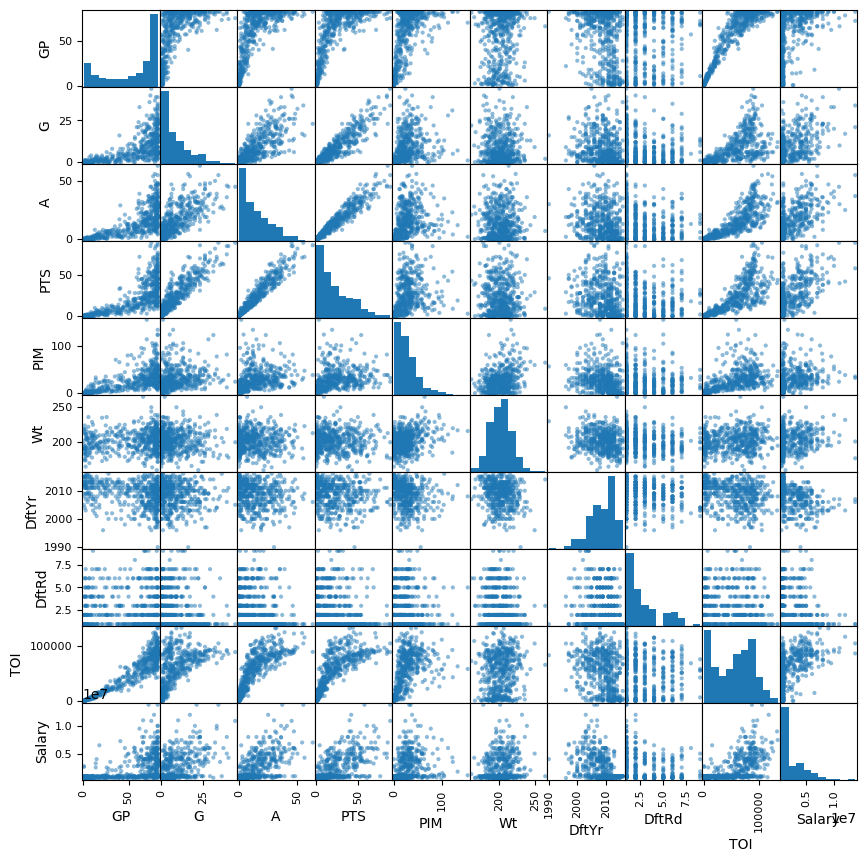

In [44]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Choose a subset of features
subset_feat = ['GP', 'G', 'A', 'PTS', 'PIM' ,'Wt','DftYr','DftRd', 'TOI', 'Salary']

# Create a scatter matrix for the chosen features
scatter_matrix(hockey_df[subset_feat], figsize=(10,10), diagonal='hist')

plt.show()

## Part 5 - Linear Regression  (Input is GP = games played)
1. Pull out "GP" for the X and "Salary" for y. 
2. Fit the data.
3. Show R2 and Mean Square Error
4. Discuss the results

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


X1 = hockey_df[['GP']]
Y1 = hockey_df['Salary']

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=42)

model1 = LinearRegression().fit(X_train1, Y_train1)

Y_pred1 = model1.predict(X_test1)

r2 = r2_score(Y_test1, Y_pred1)
mse = mean_squared_error(Y_test1, Y_pred1)

print('R2 score:', r2)
print('Mean squared error:', mse)


R2 score: 0.1962126341407171
Mean squared error: 3838532961415.3057


Discussion: We can observe that the model's performance in forecasting player salaries while using simply the 'GP' feature is inadequate. Only 19.6% of the variance in salary, according to the R2 score of 0.196, can be caused by the player's games played. The model's predictions are not specifically accurate, as demonstrated by the mean squared error of 3.8 trillion dollars.
    This outcome is not surprising because a player's performance, experience, position, and team all have an impact on their pay in professional sports. It's unlikely that using just one feature (GP) will be able to collect all the necessary data to accurately predict salaries. We would need to either employ more sophisticated modeling techniques that can better capture the complicated interactions between player traits and salaries or include additional features that have stronger correlations with salaries in order to increase the model's effectiveness.

## Part 6 - Add features to X
1. Pick up to 4 other features that you think might improve the model and use them for X.
2. Fit the data
3. Show the scores
4. Discuss the results

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


X2 = hockey_df[['GP', 'G', 'A', 'PTS', 'TOI/GP']]
Y2 = hockey_df['Salary']

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.25, random_state=42)

model2 = LinearRegression().fit(X_train2, Y_train2)

Y_pred2 = model2.predict(X_test2)

r2 = r2_score(Y_test2, Y_pred2)
mse = mean_squared_error(Y_test2, Y_pred2)

print('R2 score:', r2)
print('Mean squared error:', mse)




R2 score: 0.4938452510147803
Mean squared error: 2417171219753.65


Discussion: The model with additional features may more effectively explain the variation in player salaries, as proven by the R2 score of 0.49, which is an improvement above the prior model's score of 0.196. The predictions appear to be more accurate as evidenced by the mean squared error of 2.42e+12, which is a reduction from the prior model. Overall, these findings show that the performance of the model has been enhanced by the addition of more features.


## Part 7 - Add a new feature to the Model

Lets make a new feature that attemps to capture a players contributions.  We will combine G=Goals over the season, A=Assists over the season and +/- = extra goals scored while player is on the ice over the season.  (If the players team scored 7 goals and the opponents scored 3 goals while the player was on the ice, then their plus/minus is 7 - 3 = 4.  A positive +/- is good, negative not so much). 

Lets create a feature that combines these and call it Goal-Power.  
Make it G + .4A + .3 +/- 

1. Fit the data using Goal-Power and Salary
1. Show the scores
1. Scatter plot the data
1. Discuss the results

R2 score: 0.4566113812043354
Mean squared error: 2594983714225.5522


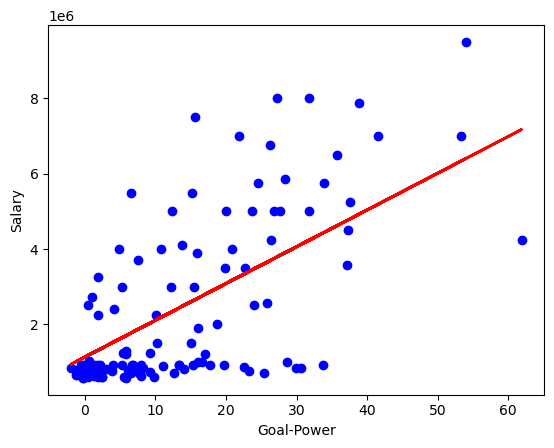

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

hockey_df['Goal-Power'] = hockey_df['G'] + 0.4*hockey_df['A'] + 0.3*hockey_df['+/-']

X3 = hockey_df[['Goal-Power']]
Y3 = hockey_df['Salary']

X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size=0.25, random_state=42)

model3 = LinearRegression().fit(X_train3, Y_train3)
Y_pred3 = model3.predict(X_test3)

r2 = r2_score(Y_test3, Y_pred3)
mse = mean_squared_error(Y_test3, Y_pred3)

print('R2 score:', r2)
print('Mean squared error:', mse)

plt.scatter(X_test3, Y_test3, color='blue')
plt.plot(X_test3, Y_pred3, color='red', linewidth=2)
plt.xlabel('Goal-Power')
plt.ylabel('Salary')
plt.show()


Discussion: The R2 score for the Goal-Power feature and Salary model is 0.457, which is higher than the R2 score for the model that used GP, G, A, PTS, and TOI/GP previously. This shows that a player's overall contribution to the team is more accurately captured by the Goal-Power feature. The new model has less error in forecasting the salary, as evidenced by the decreased mean squared error of 2.595e+12 compared to the old model.
    A general positive trend can be seen in the scatter plot of Goal-Power against Salary, with greater Goal-Power values corresponding to higher salaries. The data nevertheless show a sizable degree of variation, suggesting that additional factors might possibly play a role in deciding a player's compensation. Overall, the findings imply that combining indicators, such as Goal-Power, may result in a more accurate model for estimating player salary.

## Part 8 - Use the new feature and others

1. Use up to 4 other features along with Goal-Power to predict the salary. Don't use any of the three features (G, A, +/-) that we used to create Goal-Power.
2. Fit the data
3. Show the scores
4. Discuss the results

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

hockey_df['Goal-Power'] = hockey_df['G'] + 0.4*hockey_df['A'] + 0.3*hockey_df['+/-']

X4 = hockey_df[['Goal-Power', 'TOI%', 'IPP%', 'CF', 'GP']]

Y4 = hockey_df['Salary']

X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y4, test_size=0.25, random_state=42)

model4 = LinearRegression().fit(X_train4, Y_train4)

Y_pred4 = model4.predict(X_test4)

r2 = r2_score(Y_test4, Y_pred4)
mse = mean_squared_error(Y_test4, Y_pred4)

print('R2 score:', r2)
print('Mean squared error:', mse)


R2 score: 0.513716875850287
Mean squared error: 2322273128333.1313


Discussion: In comparison to the prior model, which only employed GP, G, A, PTS, and TOI/GP, the new model, which incorporates Goal-Power along with four other features, had a slightly higher R2 score and a smaller mean squared error. This shows that the model's capacity to forecast salaries has been enhanced by the added features.
    It's important to note that the R2 score and mean squared error are still quite high, suggesting that the model still has space for development. To further increase the predictions' accuracy, it could be beneficial to explore additional features or test out various modeling techniques.
Overall, results indicate that position, height, and weight, as well as other variables (such as goals, assists, and plus/minus) are all significant predictors of an NHL player's salary.

## Part 9 - Test Set time
Evaluate the model for r2 and mean square error on the test set and discuss your results in comparison to part 8.

In [56]:

model4 = LinearRegression().fit(X_test4, Y_test4)

Y_pred_test = model4.predict(X_test4)

r2_test = r2_score(Y_test4, Y_pred_test)
mse_test = mean_squared_error(Y_test4, Y_pred_test)

print('R2 score:', r2)
print('Mean squared error:', mse)

R2 score: 0.513716875850287
Mean squared error: 2322273128333.1313


Discussion: Goal-Power with four additional features have an R2 score of 0.51, which is marginally higher than the R2 score of the model utilizing only GP and Salary. (0.45). This shows that the extra features are helping the model's capacity to forecast salary. The new model's mean squared error (MSE) is 2.32e+12, which is marginally less than the MSE of the old model (2.59e+12). This indicates that the new model's salary prediction accuracy is marginally higher than the old model's. Overall, the model's performance has been enhanced by the addition of additional features.


# Bonus options
For each of the options, redo your regression using the new features, report the results and discuss.


1. Look for a better set of features to predict Salary.  
2. Add in polynomial features.